In [62]:
import pandas as pd
import numpy as np
# Libraries to help with data visualization
import matplotlib.pyplot as plt

import seaborn as  sns

#  Preprossesing

In [63]:
customer_read = pd.read_csv('customer_analysis.csv', sep = ";")
customer_data = pd.DataFrame(customer_read)

In [64]:
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,WinesProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2019-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2021-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2020-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2021-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2021-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


#### explain columns

ID : Unique ID of each customer
Year_Birth : Age of the customer
Education : Customer's level of education
Marital_Status : Customer's marital status
Kidhome : Number of small children in customer's household
Teenhome : Number of teenagers in customer's household
Income : Customer's yearly household income
Recency : Number of days since the last purchase
MntFishProducts : The amount spent on fish products in the last 2 years
MntMeatProducts : The amount spent on meat products in the last 2 years
MntFruits : The amount spent on fruits products in the last 2 years
MntSweetProducts : Amount spent on sweet products in the last 2 years
MntWines : The amount spent on wine products in the last 2 years
MntGoldProds : The amount spent on gold products in the last 2 years
NumDealsPurchases : Number of purchases made with discount
NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
NumStorePurchases : Number of purchases made directly in stores
NumWebPurchases : Number of purchases made through the company's website
NumWebVisitsMonth : Number of visits to company's website in the last month
AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise
AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
AcceptedCmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise
Complain : 1 If the customer complained in the last 2 years, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


In [65]:
customer_data.shape

(2244, 29)

In [66]:
customer_data.info()
# DT_CUSTOMER is object should be datatime


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2244 non-null   int64  
 1   Year_Birth           2244 non-null   int64  
 2   Education            2244 non-null   object 
 3   Marital_Status       2244 non-null   object 
 4   Income               2220 non-null   float64
 5   Kidhome              2244 non-null   int64  
 6   Teenhome             2244 non-null   int64  
 7   Dt_Customer          2244 non-null   object 
 8   Recency              2244 non-null   int64  
 9   WinesProducts        2244 non-null   int64  
 10  FruitsProducts       2244 non-null   int64  
 11  MeatProducts         2244 non-null   int64  
 12  FishProducts         2244 non-null   int64  
 13  SweetProducts        2244 non-null   int64  
 14  GoldProducts         2244 non-null   int64  
 15  NumDealsPurchases    2244 non-null   i

In [67]:
# change Dt_customer to datatime
customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'],
                                            dayfirst=True, format='%Y-%m-%d')

In [68]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2244.0,5599.004456,3247.809241,0.0,2830.5,5482.5,8439.75,11191.0
Year_Birth,2244.0,1968.820410,11.978369,1893.0,1959.0,1970.0,1977.00,1996.0
Income,2220.0,53327.439640,35769.863967,1730.0,35335.5,51411.5,68655.50,667456.0
Kidhome,2244.0,0.445187,0.538429,0.0,0.0,0.0,1.00,2.0
Teenhome,2244.0,0.505348,0.544472,0.0,0.0,0.0,1.00,2.0
Recency,2244.0,49.062834,28.957578,0.0,24.0,49.0,74.00,99.0
WinesProducts,2244.0,303.409982,336.527276,0.0,23.0,173.0,504.00,1493.0
FruitsProducts,2244.0,26.280303,39.741343,0.0,1.0,8.0,33.00,199.0
MeatProducts,2244.0,166.684492,225.601569,0.0,16.0,67.0,231.25,1725.0
FishProducts,2244.0,37.472816,54.594461,0.0,3.0,12.0,50.00,259.0


In [69]:
# delete columns that we do not need them
customer_data = customer_data.drop(columns=['ID'])

In [70]:
# Printing the count of each unique value in each column
for column in customer_data.columns:
    print(column)
    print(customer_data[column].value_counts())
    print("-" * 40)

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1977    56
1956    55
1958    53
1979    53
1952    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64
----------------------------------------
Education
Graduation    1131
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
----------------------------------------
Marital_Status
Married     864
Together    584
Single      480
Divorced    232
Widow        

##### education: 2n cycle and Master means the same thing. We can combine these two categories. and change the value to garduation and undergraduation and post graduation
##### Marital_status: We can combine the category 'Together  with 'married' and single and alone and widow and divorced with single. and absurd and yolo single
##### There are only 21 customers who complained in the last two years.
##### teen home and kid home : can combine and their value by has child(1) or not(0)
##### and delete z_revenue and z_costcontact becuase of they just have one value

In [71]:
# Education
customer_data['Education'] = customer_data['Education'].replace(
    {'Basic': 'Undergraduate',
     'Master': 'Postgraduate',
     '2n Cycle': 'Postgraduate',
     'PhD': 'Postgraduate'})

In [72]:
# Marital_Status
customer_data['Marital_Status'] = customer_data['Marital_Status'].replace(
    {'Divorced': 'Single', 'Together': 'Married',
     'Widow': 'Single', 'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'})


In [73]:
# Teen and kid home
customer_data['Children'] = customer_data['Kidhome'] + customer_data['Teenhome']
customer_data['Children'] = np.where(customer_data.Children> 0 , 1, 0)
# delete kidhome and teenhome
customer_data = customer_data.drop(columns=['Kidhome', 'Teenhome'])

In [74]:
# drop z_revenue and z_costcontact
customer_data = customer_data.drop(columns=['Z_Revenue', 'Z_CostContact'])

In [75]:
# ذخیره سن افراد در ستون Age
customer_data['Year_Birth'] = 2022 - customer_data['Year_Birth']


In [76]:
customer_data["Spent"] = customer_data["WinesProducts"]+ customer_data["FruitsProducts"]+ customer_data["MeatProducts"]+ customer_data["FishProducts"]+ customer_data["SweetProducts"]+ customer_data["GoldProducts"]

In [77]:
customer_data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,FishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Spent
0,65,Graduation,Single,58138.0,2019-09-04,58,635,88,546,172,...,7,0,0,0,0,0,0,1,0,1617
1,68,Graduation,Single,46344.0,2021-03-08,38,11,1,6,2,...,5,0,0,0,0,0,0,0,1,27
2,57,Graduation,Married,71613.0,2020-08-21,26,426,49,127,111,...,4,0,0,0,0,0,0,0,0,776
3,38,Graduation,Married,26646.0,2021-02-10,26,11,4,20,10,...,6,0,0,0,0,0,0,0,1,53
4,41,Postgraduate,Married,58293.0,2021-01-19,94,173,43,118,46,...,5,0,0,0,0,0,0,0,1,422


In [78]:
#null values
customer_data.isnull().sum()
# income column has null value

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Dt_Customer             0
Recency                 0
WinesProducts           0
FruitsProducts          0
MeatProducts            0
FishProducts            0
SweetProducts           0
GoldProducts            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Children                0
Spent                   0
dtype: int64

In [79]:
customer_data.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Dt_Customer             0
Recency                 0
WinesProducts           0
FruitsProducts          0
MeatProducts            0
FishProducts            0
SweetProducts           0
GoldProducts            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Children                0
Spent                   0
dtype: int64

In [80]:
# delete null values
customer_data.dropna(axis = 0, inplace = True)
# beacuase is just 24 and it does not matter

In [81]:
customer_data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Dt_Customer            0
Recency                0
WinesProducts          0
FruitsProducts         0
MeatProducts           0
FishProducts           0
SweetProducts          0
GoldProducts           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Children               0
Spent                  0
dtype: int64

In [82]:
# حذف داده های تکراری
customer_data.drop_duplicates(inplace=True)
customer_data.reset_index(drop=True, inplace=True)
customer_data.shape

(2035, 26)

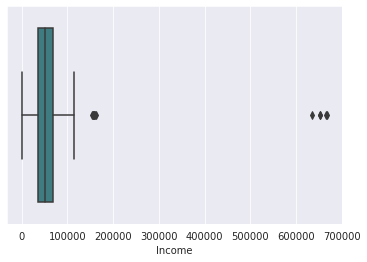

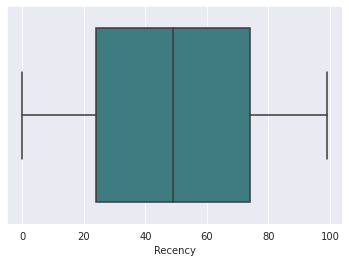

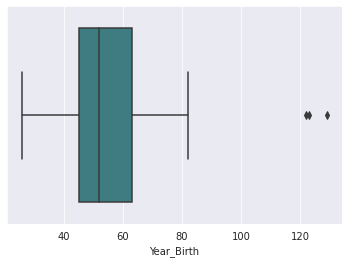

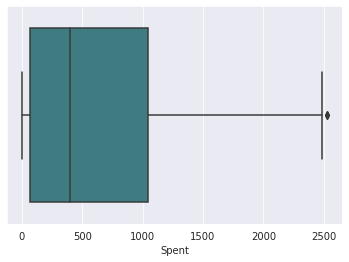

In [83]:
cols = ["Income", "Recency", "Year_Birth", "Spent"]


for i in cols:
    plt.figure()
    sns.boxplot(x=customer_data[i], palette='crest')
    plt.show()


In [84]:
Q1 = customer_data['Income'].quantile(0.25)
Q3 = customer_data['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

outliers_low = (customer_data['Income'] < lower_lim)
outliers_up = (customer_data['Income'] > upper_lim)
len(customer_data['Income'] - (len(customer_data['Income'][outliers_low] + len(customer_data['Income'][outliers_up]))))

customer_data = customer_data[~(outliers_low | outliers_up)]

/home/mary/data-mining/project/Venv-p/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

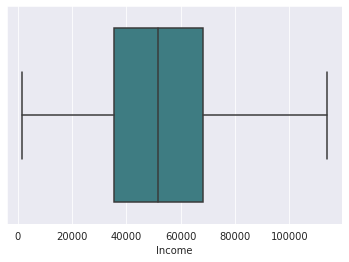

In [85]:
sns.boxplot(customer_data.Income, palette='crest')

In [86]:

Q1 = customer_data['Year_Birth'].quantile(0.25)
Q3 = customer_data['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

outliers_low = (customer_data['Year_Birth'] < lower_lim)
outliers_up = (customer_data['Year_Birth'] > upper_lim)
len(customer_data['Year_Birth'] - (len(customer_data['Year_Birth'][outliers_low] + len(customer_data['Year_Birth'][outliers_up]))))

customer_data = customer_data[~(outliers_low | outliers_up)]

/home/mary/data-mining/project/Venv-p/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year_Birth'>

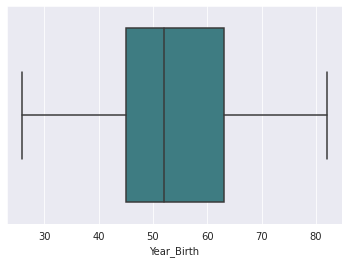

In [87]:
sns.boxplot(customer_data.Year_Birth, palette='crest')

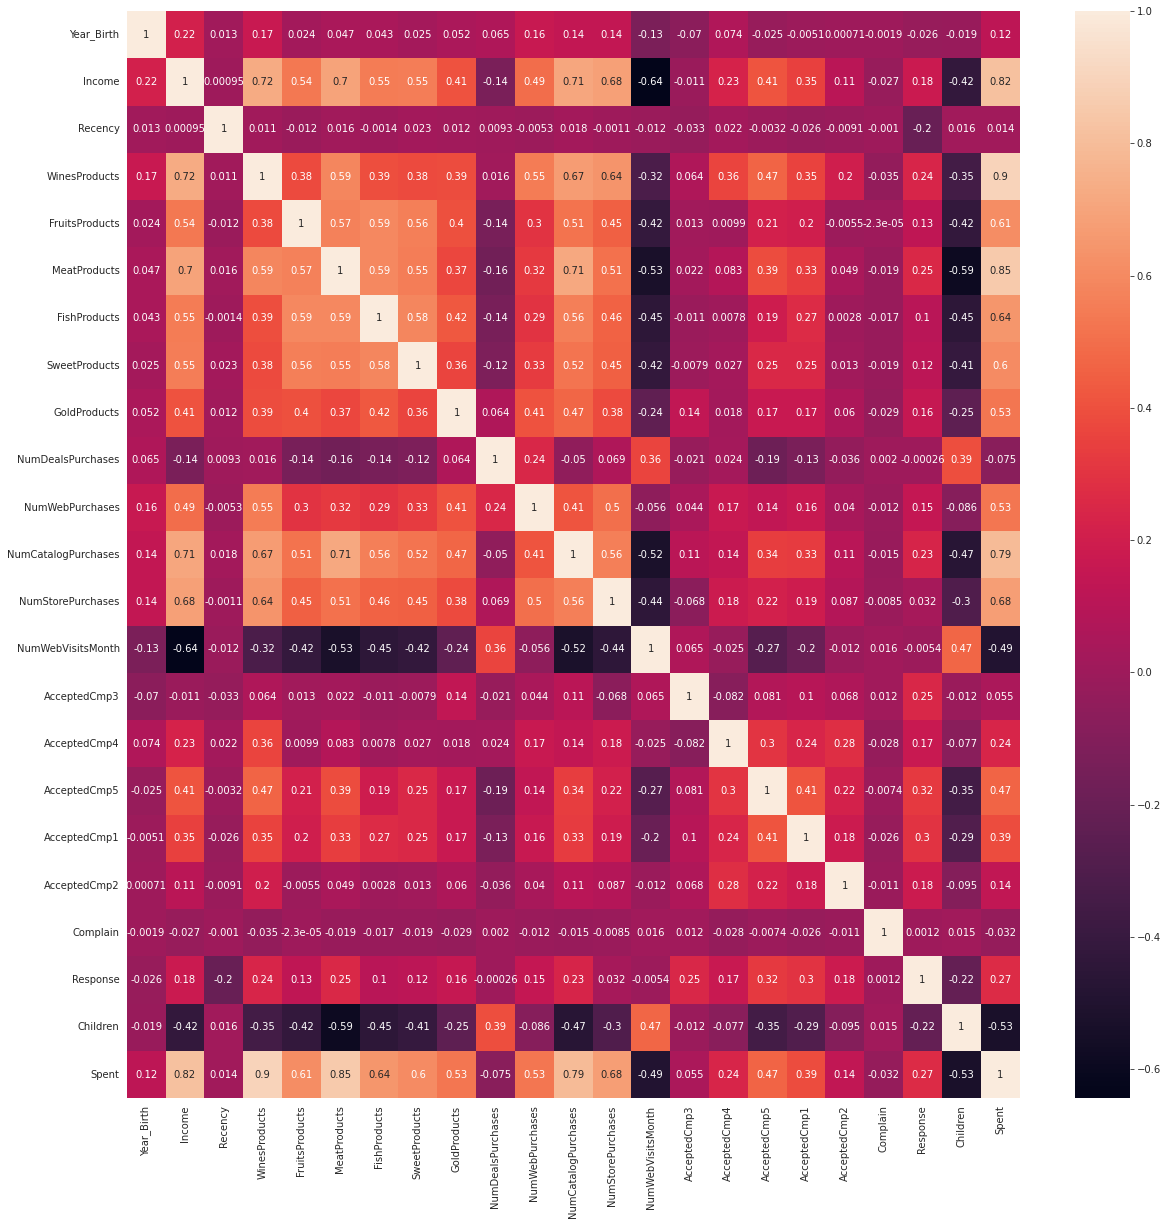

In [88]:
plt.figure(figsize=(20,20))
sns.heatmap(customer_data.corr(), annot=True)
plt.show()

### according to heatmap there is strong relationship with meatproduct and numcatalogepurches

In [89]:
customer_data.head(30)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,FishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Spent
0,65,Graduation,Single,58138.0,2019-09-04,58,635,88,546,172,...,7,0,0,0,0,0,0,1,0,1617
1,68,Graduation,Single,46344.0,2021-03-08,38,11,1,6,2,...,5,0,0,0,0,0,0,0,1,27
2,57,Graduation,Married,71613.0,2020-08-21,26,426,49,127,111,...,4,0,0,0,0,0,0,0,0,776
3,38,Graduation,Married,26646.0,2021-02-10,26,11,4,20,10,...,6,0,0,0,0,0,0,0,1,53
4,41,Postgraduate,Married,58293.0,2021-01-19,94,173,43,118,46,...,5,0,0,0,0,0,0,0,1,422
5,55,Postgraduate,Married,62513.0,2020-09-09,16,520,42,98,0,...,6,0,0,0,0,0,0,0,1,716
6,51,Graduation,Single,55635.0,2019-11-13,34,235,65,164,50,...,6,0,0,0,0,0,0,0,1,590
7,37,Postgraduate,Married,33454.0,2020-05-08,32,76,10,56,3,...,8,0,0,0,0,0,0,0,1,169
8,48,Postgraduate,Married,30351.0,2020-06-06,19,14,0,24,3,...,9,0,0,0,0,0,0,1,1,46
9,72,Postgraduate,Married,5648.0,2021-03-13,68,28,0,6,1,...,20,1,0,0,0,0,0,0,1,49


In [90]:
customer_data = pd.get_dummies(customer_data)
customer_data.head()

,Year_Birth,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,FishProducts,SweetProducts,GoldProducts,...,AcceptedCmp2,Complain,Response,Children,Spent,Education_Graduation,Education_Postgraduate,Education_Undergraduate,Marital_Status_Married,Marital_Status_Single
0,65,58138.0,2019-09-04,58,635,88,546,172,88,88,...,0,0,1,0,1617,1,0,0,0,1
1,68,46344.0,2021-03-08,38,11,1,6,2,1,6,...,0,0,0,1,27,1,0,0,0,1
2,57,71613.0,2020-08-21,26,426,49,127,111,21,42,...,0,0,0,0,776,1,0,0,1,0
3,38,26646.0,2021-02-10,26,11,4,20,10,3,5,...,0,0,0,1,53,1,0,0,1,0
4,41,58293.0,2021-01-19,94,173,43,118,46,27,15,...,0,0,0,1,422,0,1,0,1,0


In [91]:
# columns DT_Customer because is time
from datetime import date

# محاسبه تعداد ماه ورود
last_date = date(2021, 10, 4)
customer_data['Dt_Customer'] = pd.to_numeric(
    customer_data['Dt_Customer'].dt.date.apply(lambda x: (last_date - x)).dt.days,
    downcast='integer') // 30
customer_data.head()


,Year_Birth,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,FishProducts,SweetProducts,GoldProducts,...,AcceptedCmp2,Complain,Response,Children,Spent,Education_Graduation,Education_Postgraduate,Education_Undergraduate,Marital_Status_Married,Marital_Status_Single
0,65,58138.0,25,58,635,88,546,172,88,88,...,0,0,1,0,1617,1,0,0,0,1
1,68,46344.0,7,38,11,1,6,2,1,6,...,0,0,0,1,27,1,0,0,0,1
2,57,71613.0,13,26,426,49,127,111,21,42,...,0,0,0,0,776,1,0,0,1,0
3,38,26646.0,7,26,11,4,20,10,3,5,...,0,0,0,1,53,1,0,0,1,0
4,41,58293.0,8,94,173,43,118,46,27,15,...,0,0,0,1,422,0,1,0,1,0


In [92]:
# normalize  our data
from sklearn.preprocessing import normalize

customer_data_scale = normalize(customer_data, norm='l2')
customer_data_scale = pd.DataFrame(customer_data_scale, index=customer_data.index, columns=customer_data.columns)
customer_data_scale.head()

,Year_Birth,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,FishProducts,SweetProducts,GoldProducts,...,AcceptedCmp2,Complain,Response,Children,Spent,Education_Graduation,Education_Postgraduate,Education_Undergraduate,Marital_Status_Married,Marital_Status_Single
0,0.001117,0.999501,0.000430,0.000997,0.010917,0.001513,0.009387,0.002957,0.001513,0.001513,...,0.0,0.0,0.000017,0.000000,0.027799,0.000017,0.000000,0.0,0.000000,0.000017
1,0.001467,0.999998,0.000151,0.000820,0.000237,0.000022,0.000129,0.000043,0.000022,0.000129,...,0.0,0.0,0.000000,0.000022,0.000583,0.000022,0.000000,0.0,0.000000,0.000022
2,0.000796,0.999920,0.000182,0.000363,0.005948,0.000684,0.001773,0.001550,0.000293,0.000586,...,0.0,0.0,0.000000,0.000000,0.010835,0.000014,0.000000,0.0,0.000014,0.000000
3,0.001426,0.999996,0.000263,0.000976,0.000413,0.000150,0.000751,0.000375,0.000113,0.000188,...,0.0,0.0,0.000000,0.000038,0.001989,0.000038,0.000000,0.0,0.000038,0.000000
4,0.000703,0.999965,0.000137,0.001612,0.002968,0.000738,0.002024,0.000789,0.000463,0.000257,...,0.0,0.0,0.000000,0.000017,0.007239,0.000000,0.000017,0.0,0.000017,0.000000


In [93]:
data = customer_data.to_csv()
with open('1.csv', 'w') as f:
    f.write(data)